# W11 Exercises

### EXERCISE 1

How would you create the above plot in Seaborn instead?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv('https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/blob/master/resources/data/aries_crash_data_2018_filtered.csv?raw=true')

In [4]:
# Get the first entry for each of these
coll_df = pd.DataFrame({"date" : grouped.COLLDTE.first(),
                        "time": grouped.COLLISION_TIME.first() + grouped.COLLISION_TIME_AM_PM.first(), 
                        "injured": grouped.INJUREDNMB.first(),
                        "deceased": grouped.DEADNMB.first(),
                        "weather": grouped.WEATHERDESCR.first(),
                        "accident_count": 1
                       })

In [5]:
coll_df.index = pd.to_datetime(coll_df.date + ' ' + coll_df.time)

/var/folders/vh/sqk7v_s5341b114b1gjpxhrh0000gn/T/ipykernel_6463/2959724414.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coll_df.index = pd.to_datetime(coll_df.date + ' ' + coll_df.time)


In [6]:
def get_mode(x):
    return x.mode()

In [7]:
accidents_per_day = coll_df.groupby(coll_df.index.date).agg(
    # Create a new column called weather which gets the modal weather for each day
    weather = ('weather', get_mode),
    # And accidents which is the number of accidents that day
    accidents = ('accident_count', sum))

/var/folders/vh/sqk7v_s5341b114b1gjpxhrh0000gn/T/ipykernel_6463/2800633943.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  accidents_per_day = coll_df.groupby(coll_df.index.date).agg(


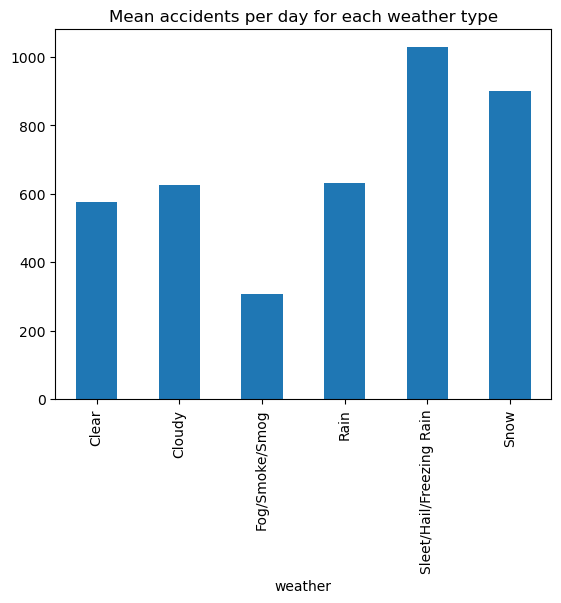

In [8]:
accidents_per_day.groupby('weather').accidents.mean().plot.bar();
plt.title('Mean accidents per day for each weather type');

/Users/suchismitanaik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suchismitanaik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suchismitanaik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/vh/sqk7v_s5341b114b1gjpxhrh0000gn/T/ipykernel_6463/1510902039.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a 

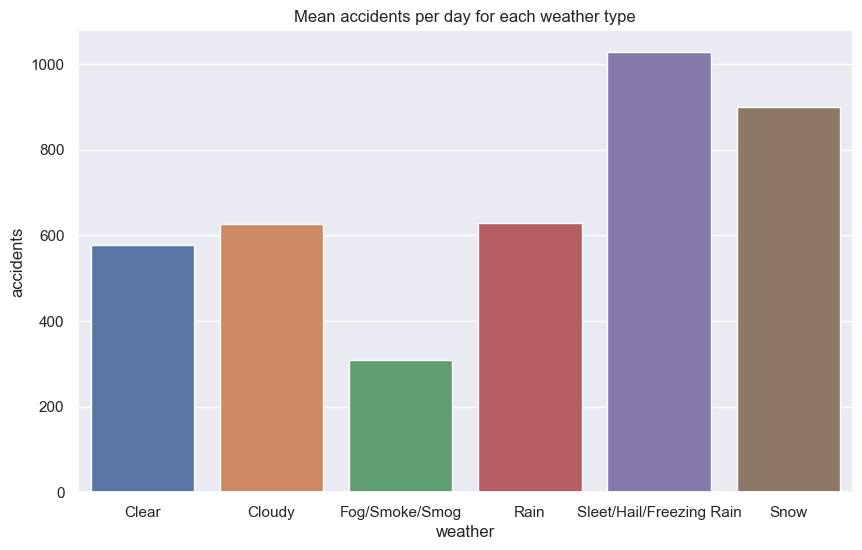

In [12]:
sns.set(rc={'figure.figsize':(10,6)})

mean_accidents = accidents_per_day.groupby('weather').accidents.mean().reset_index()
bar_plot = sns.barplot(x='weather', y='accidents', data=mean_accidents)

bar_plot.set_title('Mean accidents per day for each weather type')

bar_plot.figure.show()

### EXERCISE 2

Find a question that you'd like to answer with this data or the reddit data. Figure out how to filter/clean/group the data to produce the summary data that will help you to find that answer, and produce a visualization.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
raw_df = pd.read_csv('reddit_data.csv')

In [15]:
raw_df

,post_id,title,self_text,length_of_post,num_emoticons,karma,num_comments,comments_data
0,180wtbn,231122 r/bangtan Books with Luv: November Book...,Hello bibliophiles of r/bangtan! \n\n\n\n\nHow...,3715,1,34,7,"[{'comment_id': 'ka9k009', 'comment_body': 'I ..."
1,183gka3,231125 Jung Kook ‘GOLDEN’ Live On Stage Delaye...,Hello once again!\n\nIf you were unable to wat...,1123,7,105,285,"[{'comment_id': 'kapbfao', 'comment_body': 'ht..."
2,183h0i9,231125 Melon on Twitter: Melon Music Awards Wo...,[Jimin - King of K-pop Award](https://twitter....,346,3,119,9,"[{'comment_id': 'kaokss9', 'comment_body': 'Co..."
3,183ithw,231125 TXT Yeonjun mentions meeting RM at the ...,NaN,0,0,67,2,"[{'comment_id': 'kaouyo5', 'comment_body': '[F..."
4,183l800,231125 SPACE OF BTS Pop-up store in Singapore ...,NaN,0,0,28,0,[]
...,...,...,...,...,...,...,...,...
126,tg6rwn,Posibile bug?,Has anyone notice that we didn't receive the w...,153,0,8,3,"[{'comment_id': 'i10ws2t', 'comment_body': ""We..."
127,t8q9c7,Btw in the end of another story.......do we bi...,NaN,0,0,4,2,"[{'comment_id': 'i09w42o', 'comment_body': ""RM..."
128,t7ifnp,No more new 5 star cards,There hasn't been new 5 star cards in awhile.....,168,0,12,2,"[{'comment_id': 'hzi3mn9', 'comment_body': 'Th..."
129,t6bjae,Puzzle pieces,Guys do y'all know what's the use of the puzzl...,97,0,9,2,"[{'comment_id': 'hzafzfh', 'comment_body': 'Th..."


In [16]:
raw_df.isna().sum() #check the no values and here selftext is the only variable that has no data

post_id            0
title              0
self_text         32
length_of_post     0
num_emoticons      0
karma              0
num_comments       0
comments_data      0
dtype: int64

#### Question to be answered:

How does the use of emoticons affect the perception of posts and comments? This is to analyse whether posts and comments with emoticons receive more positive engagement (higher karma and more number of comments) compared to those without.

In [17]:
#separate dataframes: one for post/comment with emoticons and another for without

df_with_emoticons = raw_df[raw_df['num_emoticons'] > 0]
df_without_emoticons = raw_df[raw_df['num_emoticons'] == 0]

In [18]:
#data aggregation: for each group (with/without emoticons), calculate the average karma and number of comments to know the engagement metrics

avg_metrics_with = df_with_emoticons[['karma', 'num_comments']].mean()
avg_metrics_without = df_without_emoticons[['karma', 'num_comments']].mean()


/Users/suchismitanaik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suchismitanaik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suchismitanaik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suchismitanaik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

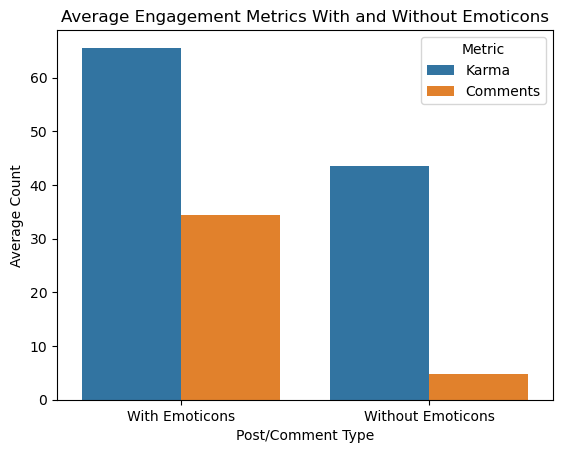

In [20]:
#Visualizing the data

#avg_metrics_with and avg_metrics_without are dictionaries with your data
data = {
    'Type': ['With Emoticons', 'Without Emoticons'] * 2,
    'Average Count': [avg_metrics_with['karma'], avg_metrics_without['karma'], avg_metrics_with['num_comments'], avg_metrics_without['num_comments']],
    'Metric': ['Karma', 'Karma', 'Comments', 'Comments']
}

df = pd.DataFrame(data)

# Create the barplot
sns.barplot(x='Type', y='Average Count', hue='Metric', data=df)

plt.title('Average Engagement Metrics With and Without Emoticons')
plt.xlabel('Post/Comment Type')
plt.ylabel('Average Count')
plt.show()

This shows that the use of emoticons leads to higher engagement (karma and number of comments) for posts and comments. This validates our assumptions about how emoticons are used to express emotions and feelings, and that they are used to convey positive emotions and feelings. This is reciprocated by the positive engagement received by posts and comments with emoticons.